In [14]:
import xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [15]:
data = pickle.load(open('xgb_models/data5.pkl', 'rb'))
model = pickle.load(open('xgb_models/opt_XGB_YN3.pkl', 'rb'))

X_train_target = data['X_train_target']
X_train_target = X_train_target.drop(['4m_Qtncs_m', '4m_Qtncs_s', '4m_Ic_med', '4m_Ic_std'], axis=1)
X_test_target = data['X_test_target']
X_test_target = X_test_target.drop(['4m_Qtncs_m', '4m_Qtncs_s', '4m_Ic_med', '4m_Ic_std'], axis=1)
X = data['X']
X = X.drop(['4m_Qtncs_m', '4m_Qtncs_s', '4m_Ic_med', '4m_Ic_std'], axis=1)

X_train = data['X_train']
X_train = X_train.drop(['4m_Qtncs_m', '4m_Qtncs_s', '4m_Ic_med', '4m_Ic_std'], axis=1)
X_test = data['X_test']
X_test = X_test.drop(['4m_Qtncs_m', '4m_Qtncs_s', '4m_Ic_med', '4m_Ic_std'], axis=1)
X_val = data['X_val']
X_val = X_val.drop(['4m_Qtncs_m', '4m_Qtncs_s', '4m_Ic_med', '4m_Ic_std'], axis=1)
X_all = data['X_all']
X_all = X_all.drop(['4m_Qtncs_m', '4m_Qtncs_s', '4m_Ic_med', '4m_Ic_std'], axis=1)

y_train = data['y_train']
y_test = data['y_test']
y_val = data['y_val']
y = data['y']

# Representer learning with sklearn Decision Trees

Create a list of predictions based on `X_train` to learn what the model learnt.

In [16]:
predictions = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_pred = model.predict(X_all)

/opt/homebrew/Caskroom/miniforge/base/envs/xai/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [17]:
# Create a reference tree from sklearn and plot
clftree = tree.DecisionTreeClassifier(max_depth=7,max_features=5)
clftree.fit(X_train, predictions)

DecisionTreeClassifier(max_depth=7, max_features=5)

In [18]:
# Reference tree testing score
print('Training score: %.2f%%' %(clftree.score(X_train, predictions) * 100))
print('Testing score: %.2f%%' %(clftree.score(X_test, y_test_pred) * 100))
print('Overall score: %.2f%%' %(clftree.score(X_all, y_pred) * 100))

Training score: 90.10%
Testing score: 87.08%
Overall score: 89.57%


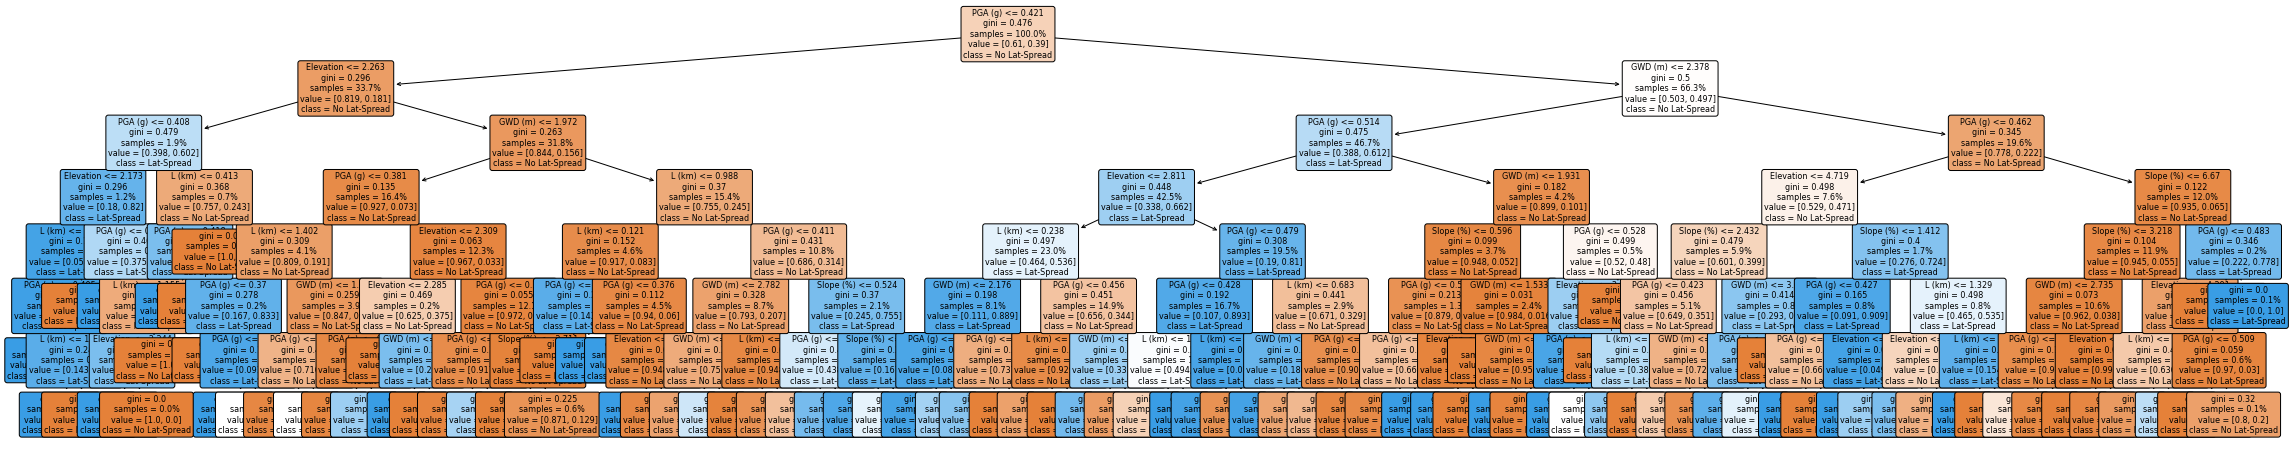

In [19]:
indices = np.array(['GWD (m)', 'Elevation', 'L (km)', 'Slope (%)', 'PGA (g)'])
fig = plt.figure(figsize=(40, 8))
vis = tree.plot_tree(clftree, feature_names=indices, class_names=['No Lat-Spread', 'Lat-Spread'], max_depth=7, fontsize=8, proportion=True, filled=True, rounded=True)

In [20]:
dotfile = open("dtree.dot", 'w')
tree.export_graphviz(clftree, out_file = dotfile, feature_names = indices,  proportion=True, filled=True, rounded=True)
dotfile.close()

## Representer tree with XGBoost

In [21]:
xgclf = xgboost.XGBClassifier(use_label_encoder=False, max_depth=5)
xgclf.fit(X_train, predictions)

/opt/homebrew/Caskroom/miniforge/base/envs/xai/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:20:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [22]:
# Reference tree testing score
print('Training score: %.2f%%' %(xgclf.score(X_train, predictions) * 100))
print('Testing score: %.2f%%' %(xgclf.score(X_test, y_test_pred) * 100))
print('Overall score: %.2f%%' %(xgclf.score(X_all, y_pred) * 100))

Training score: 99.25%
Testing score: 93.85%
Overall score: 98.20%


/opt/homebrew/Caskroom/miniforge/base/envs/xai/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/homebrew/Caskroom/miniforge/base/envs/xai/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


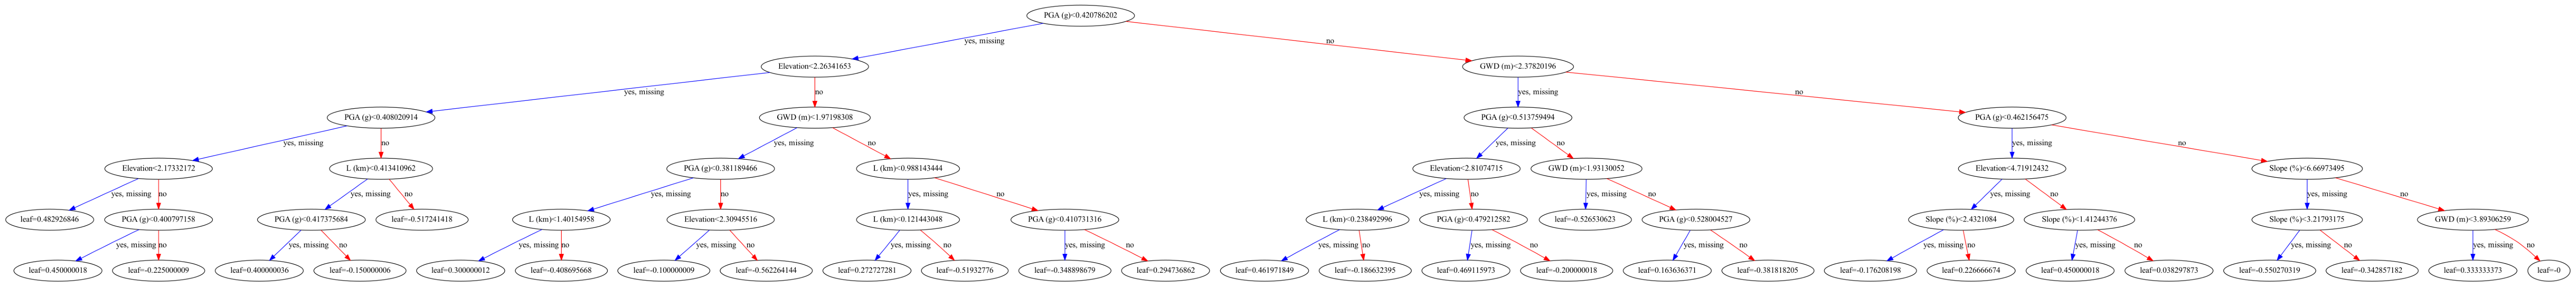

In [23]:
xgboost.plot_tree(xgclf)
plt.gcf().set_size_inches(100, 40)
plt.savefig("xgb-class.svg")

For a classification tree with 2 classes {0,1}, the value of the leaf node represent the raw score for class 1. It can be converted to a probability score by using the logistic function. The calculation below use the left most leaf as an example. The value of first leaf node is 0.210810825, so the conditional probability of class 1 prediction is 0.588 or 59%.

$$1/(1+np.exp(-1*0.210810825))=0.5525$$

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [39]:
xbgpred = xgclf.predict(X_test)
len(xbgpred)

975

In [40]:
len(y_test_pred)

975

In [45]:
print(f"This should show that we've completely overfitted the relables (i.e. F1 score == 1.0). \nSo we've mimiked the RandomForest's behaviour perfectly!")
print(classification_report(y_test_pred, xbgpred))


This should show that we've completely overfitted the relables (i.e. F1 score == 1.0). 
So we've mimiked the RandomForest's behaviour perfectly!
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       572
           1       0.95      0.90      0.92       403

    accuracy                           0.94       975
   macro avg       0.94      0.93      0.94       975
weighted avg       0.94      0.94      0.94       975



In [77]:
classifier = tree.DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, y_train)
clfpred = classifier.predict(X_test)
print(classification_report(y_test_pred, clfpred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       572
           1       0.74      0.69      0.71       403

    accuracy                           0.77       975
   macro avg       0.76      0.76      0.76       975
weighted avg       0.77      0.77      0.77       975



/opt/homebrew/Caskroom/miniforge/base/envs/xai/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


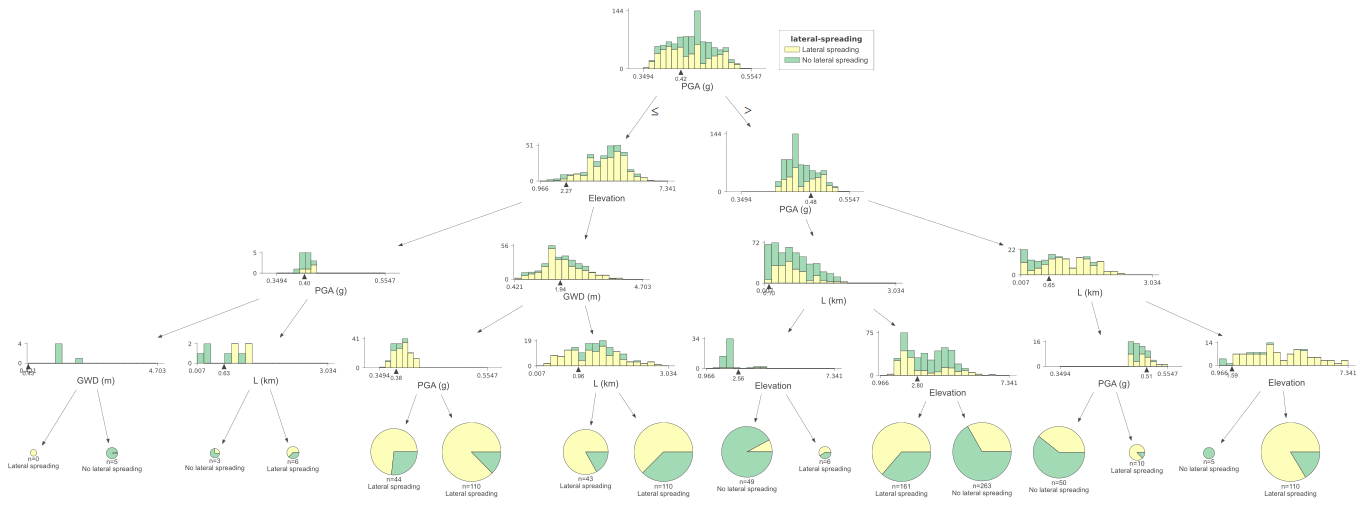

In [79]:
from dtreeviz.trees import *
viz = dtreeviz(classifier, 
               X_test,
               y_test_pred,
               target_name='lateral-spreading',
               feature_names=['GWD (m)', 'Elevation', 'L (km)', 'Slope (%)', 'PGA (g)'], 
               class_names=['No lateral spreading', 'Lateral spreading']
              )
viz